# Survey Analysis: Exploring the Use of AI Chat Assistants in Scrum

This notebook provides comprehensive descriptive analysis of the survey data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_excel('../data/processed/merged_survey_data.xlsx')
print(f"Total responses: {len(df)}")
print(f"Total questions: {len(df.columns)}")

Total responses: 159
Total questions: 105


## 1. Overview Statistics

In [2]:
# Response distribution by source
print("Responses by source:")
print(df['source'].value_counts())
print(f"\nTotal: {len(df)} responses")

Responses by source:
source
Survey 1 (respostas)    135
Survey 2 (Udemy)         24
Name: count, dtype: int64

Total: 159 responses


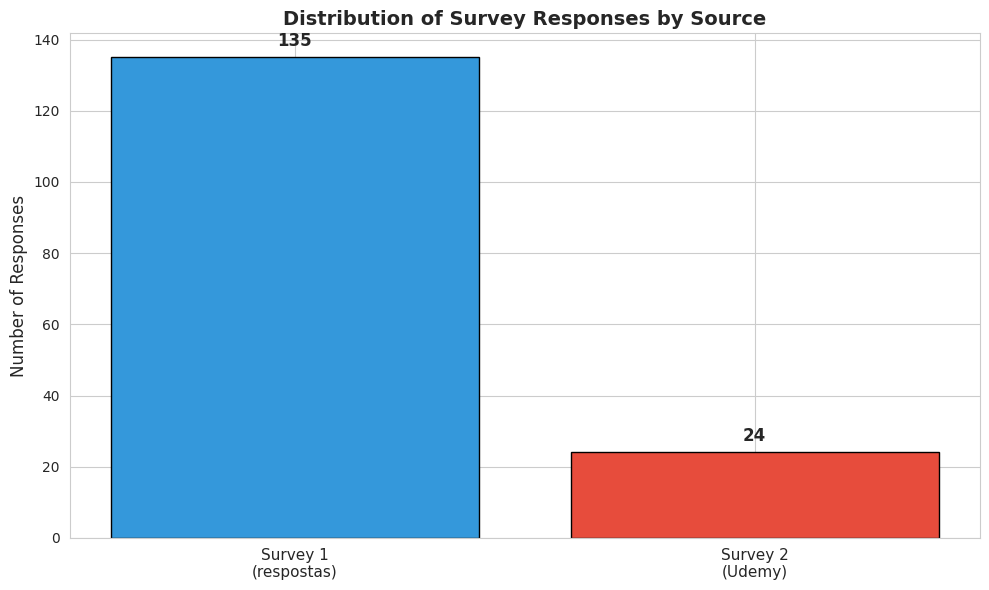

In [3]:
# Visualize response distribution
fig, ax = plt.subplots(figsize=(10, 6))
source_counts = df['source'].value_counts()
bars = ax.bar(range(len(source_counts)), source_counts.values, 
              edgecolor='black', color=['#3498db', '#e74c3c'])

for i, (bar, count) in enumerate(zip(bars, source_counts.values)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xticks(range(len(source_counts)))
ax.set_xticklabels(['Survey 1\n(respostas)', 'Survey 2\n(Udemy)'], fontsize=11)
ax.set_ylabel('Number of Responses', fontsize=12)
ax.set_title('Distribution of Survey Responses by Source', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 2. Demographics Analysis

In [4]:
# Find demographic columns
demographic_cols = [col for col in df.columns if any(x in col.lower() for x in 
                   ['role', 'experience', 'team size', 'industry', 'country'])]

print(f"Found {len(demographic_cols)} demographic questions")
for i, col in enumerate(demographic_cols[:5], 1):
    print(f"\n{i}. {col[:100]}...")
    print(df[col].value_counts().head())

Found 10 demographic questions

1. In WHAT COUNTRY do you currently work?...
In WHAT COUNTRY do you currently work?
Brazil                      76
India                       17
Germany                      6
United States of America     5
Poland                       5
Name: count, dtype: int64

2. What is your EXPERIENCE in years of working on SCRUM projects?...
What is your EXPERIENCE in years of working on SCRUM projects?
Less than 3 years          48
Between 3 and 5 years      41
No experience              30
Between 6 and 10 years     26
Between 11 and 15 years    12
Name: count, dtype: int64

3. Do you hold any of the following SCRUM-role certifications? (select all that apply)...
Do you hold any of the following SCRUM-role certifications? (select all that apply)
Scrum Master — Foundational (e.g., PSM I, CSM)                                                                                                                                                                35
Developer 

## 3. AI Usage Patterns

Question: Which AI Chat Assistants do you currently use?  ...

Which AI Chat Assistants do you currently use?  
ChatGPT (OpenAI), Copilot Chat (Microsoft)                                                                                                               9
ChatGPT (OpenAI), Gemini (Google), Copilot Chat (Microsoft)                                                                                              8
ChatGPT (OpenAI)                                                                                                                                         7
ChatGPT (OpenAI), Gemini (Google)                                                                                                                        6
ChatGPT (OpenAI), Gemini (Google), Claude (Anthropic), Copilot Chat (Microsoft)                                                                          4
ChatGPT (OpenAI), Gemini (Google), Copilot Chat (Microsoft), A proprietary or internal AI Chat Assistant develope

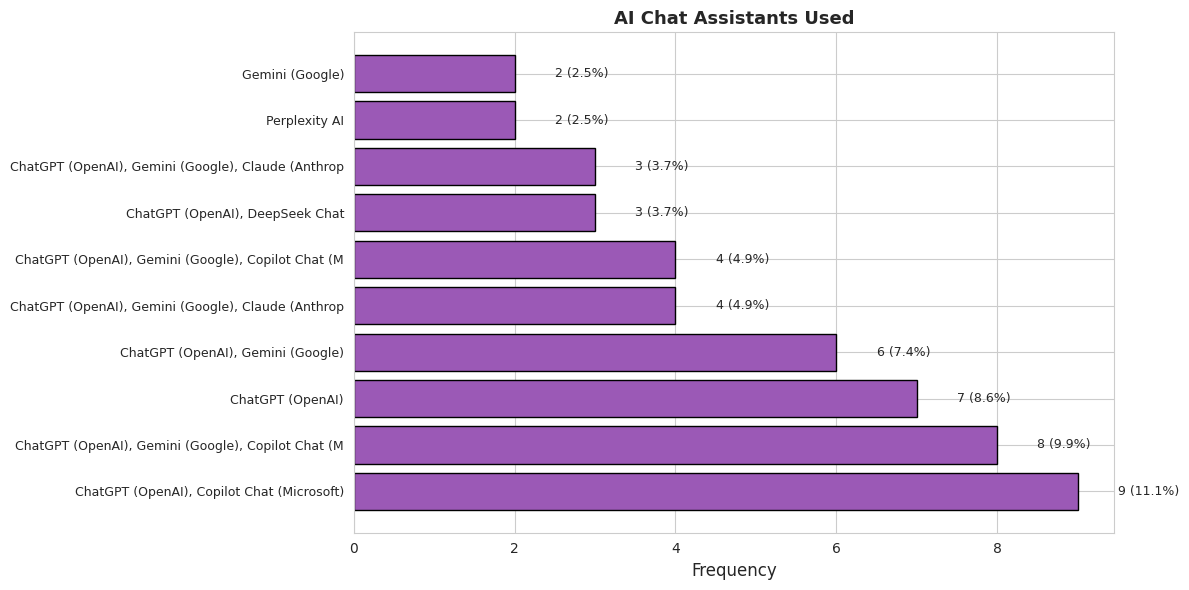

In [5]:
# AI tools used
ai_tool_cols = [col for col in df.columns if 'which ai' in col.lower() or 'what ai' in col.lower()]

if ai_tool_cols:
    col = ai_tool_cols[0]
    print(f"Question: {col[:100]}...\n")
    
    freq = df[col].value_counts().head(10)
    print(freq)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.barh(range(len(freq)), freq.values, edgecolor='black', color='#9b59b6')
    
    for i, (bar, count) in enumerate(zip(bars, freq.values)):
        pct = count / df[col].notna().sum() * 100
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                f'{count} ({pct:.1f}%)', va='center', fontsize=9)
    
    ax.set_yticks(range(len(freq)))
    ax.set_yticklabels([str(label)[:50] for label in freq.index], fontsize=9)
    ax.set_xlabel('Frequency', fontsize=12)
    ax.set_title('AI Chat Assistants Used', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 4. Frequency Analysis

Question: How often do you use AI chat assistants, for Scrum management task)? ...

How often do you use AI chat assistants, for Scrum management task)? 
Daily or almost daily                    39
Weekly                                   19
Occasionally (less than once a month)    12
Monthly                                   9
Never                                     2
Name: count, dtype: int64


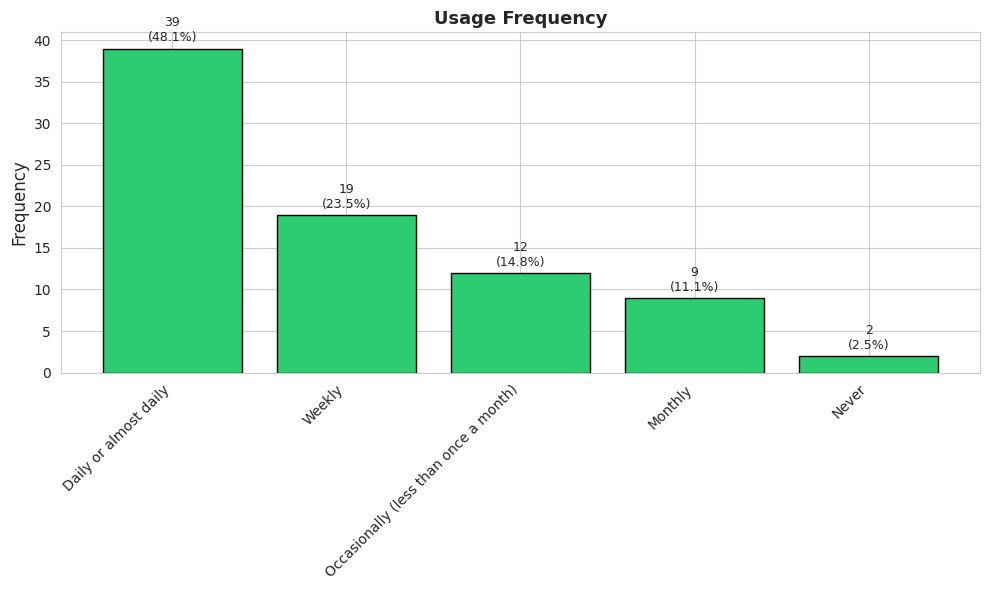

In [6]:
# Usage frequency
freq_cols = [col for col in df.columns if 'how often' in col.lower()]

if freq_cols:
    col = freq_cols[0]
    print(f"Question: {col[:100]}...\n")
    
    freq = df[col].value_counts()
    print(freq)
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(range(len(freq)), freq.values, edgecolor='black', color='#2ecc71')
    
    for i, (bar, count) in enumerate(zip(bars, freq.values)):
        pct = count / df[col].notna().sum() * 100
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)
    
    ax.set_xticks(range(len(freq)))
    ax.set_xticklabels(freq.index, rotation=45, ha='right')
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title('Usage Frequency', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 5. Benefits Analysis

Question: WHAT BENEFITS have you already experienced with AI Chat Assistant use for Scrum management tasks?...

WHAT BENEFITS have you already experienced with AI Chat Assistant use for Scrum management tasks?
Increased productivity, Improved quality of artifacts, Reduced time for repetitive tasks, Support in decision-making, Better communication with stakeholders, Faster onboarding of new team members, Improved knowledge sharing and documentation, Enhanced creativity in problem-solving, Better stakeholder alignment through clearer outputs, Increased stakeholder trust in project outputs    10
Increased productivity, Improved quality of artifacts, Reduced time for repetitive tasks, Support in decision-making                                                                                                                                                                                                                                                                                3
Increased 

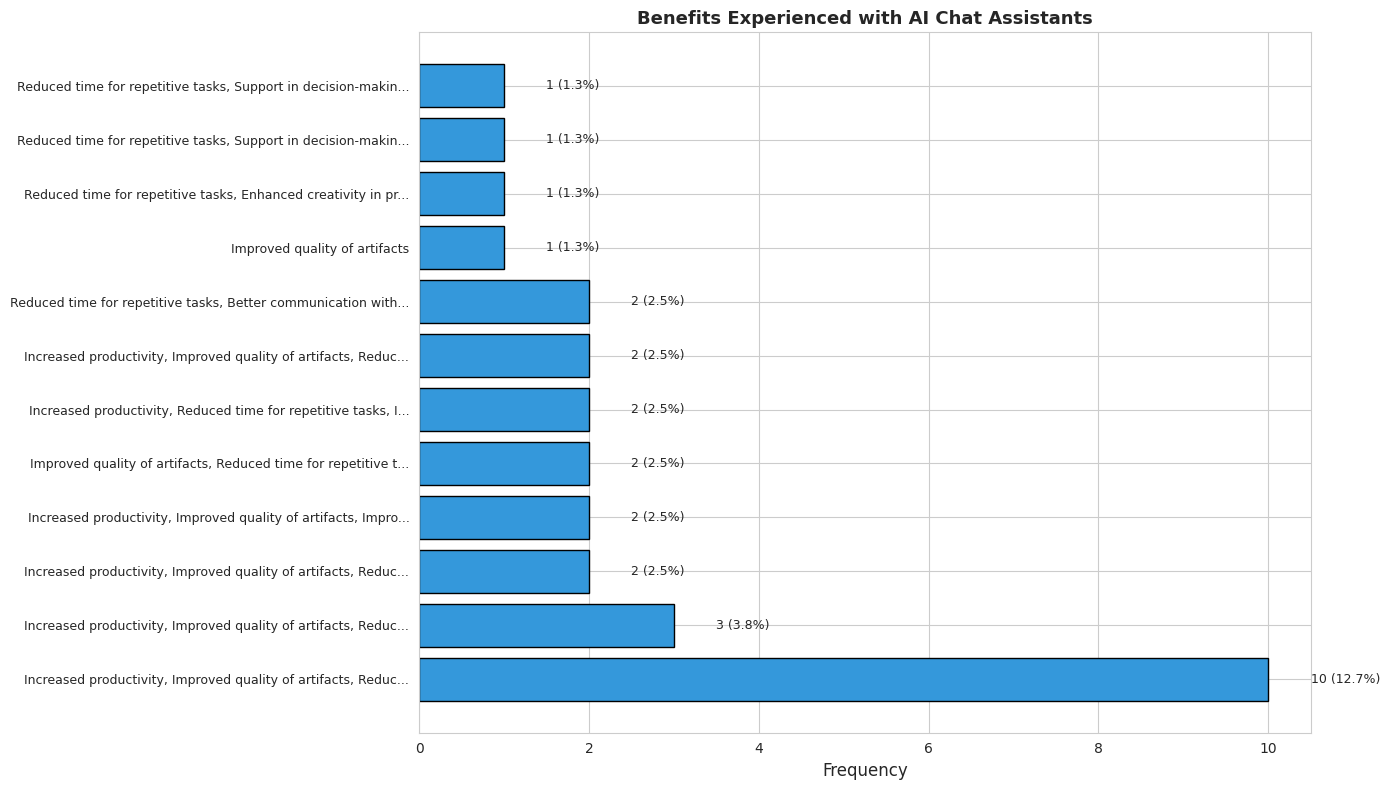

In [7]:
# Benefits experienced
benefit_cols = [col for col in df.columns if 'benefits' in col.lower() and 'experienced' in col.lower()]

if benefit_cols:
    col = benefit_cols[0]
    print(f"Question: {col[:100]}...\n")
    
    freq = df[col].value_counts().head(12)
    print(freq)
    
    # Plot
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.barh(range(len(freq)), freq.values, edgecolor='black', color='#3498db')
    
    for i, (bar, count) in enumerate(zip(bars, freq.values)):
        pct = count / df[col].notna().sum() * 100
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                f'{count} ({pct:.1f}%)', va='center', fontsize=9)
    
    ax.set_yticks(range(len(freq)))
    labels = [str(label)[:60] + '...' if len(str(label)) > 60 else str(label) for label in freq.index]
    ax.set_yticklabels(labels, fontsize=9)
    ax.set_xlabel('Frequency', fontsize=12)
    ax.set_title('Benefits Experienced with AI Chat Assistants', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 6. Challenges and Risks

Question: What is the main PROBLEM DOMAIN applied to your current/latest Scrum initiative?...

What is the main PROBLEM DOMAIN applied to your current/latest Scrum initiative?
Finance                         21
Education                       19
Transport and Distribution      13
Enterprise Resource Planning    12
Telecommunication                9
Security and Defense             7
Healthcare                       5
Pharmaceutics                    3
Retail                           3
Accessibility                    1
Web development                  1
Energy                           1
Name: count, dtype: int64


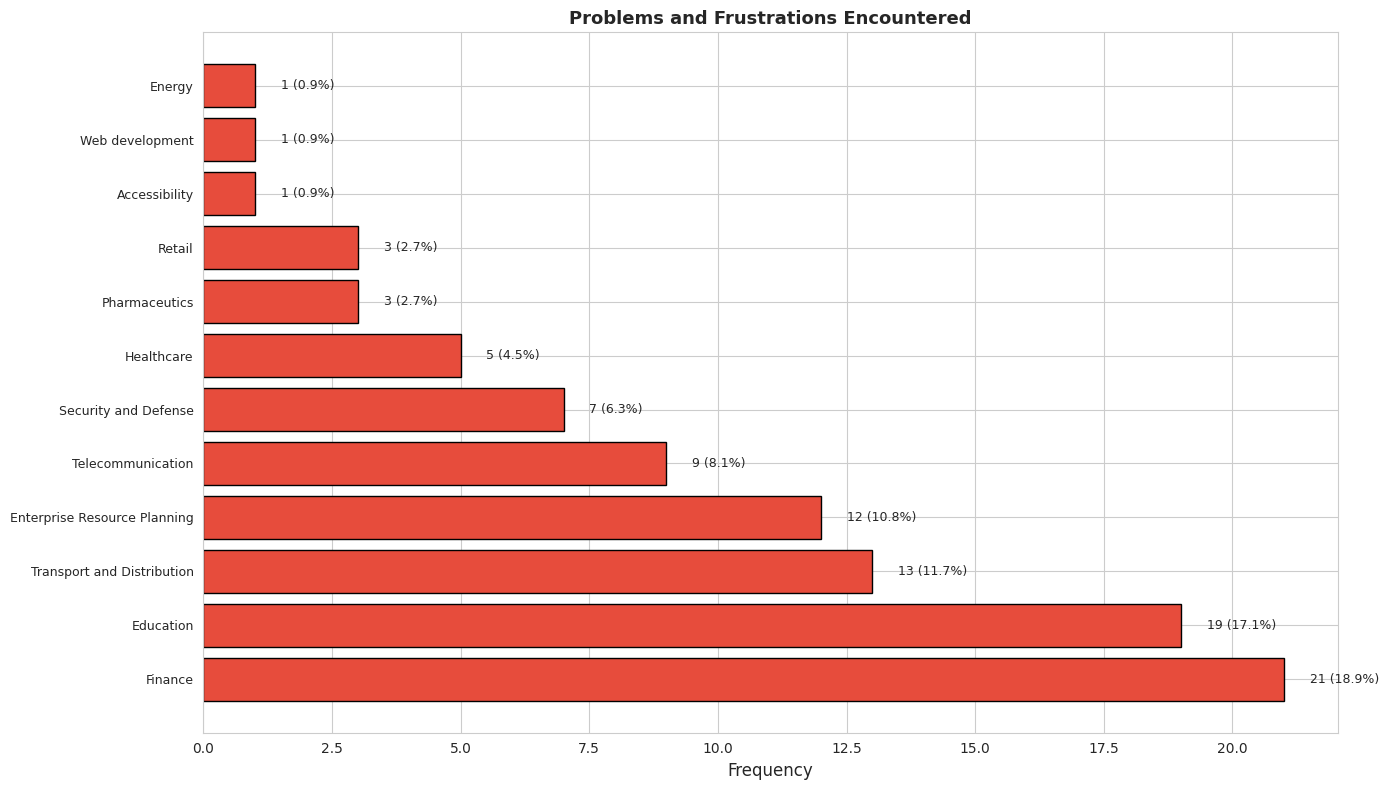

In [8]:
# Problems and frustrations
challenge_cols = [col for col in df.columns if 'problem' in col.lower() or 'frustration' in col.lower()]

if challenge_cols:
    col = challenge_cols[0]
    print(f"Question: {col[:100]}...\n")
    
    freq = df[col].value_counts().head(12)
    print(freq)
    
    # Plot
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.barh(range(len(freq)), freq.values, edgecolor='black', color='#e74c3c')
    
    for i, (bar, count) in enumerate(zip(bars, freq.values)):
        pct = count / df[col].notna().sum() * 100
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                f'{count} ({pct:.1f}%)', va='center', fontsize=9)
    
    ax.set_yticks(range(len(freq)))
    labels = [str(label)[:60] + '...' if len(str(label)) > 60 else str(label) for label in freq.index]
    ax.set_yticklabels(labels, fontsize=9)
    ax.set_xlabel('Frequency', fontsize=12)
    ax.set_title('Problems and Frustrations Encountered', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 7. Summary Statistics

In [9]:
# Create summary table
summary_data = {
    'Metric': [
        'Total Responses',
        'Survey 1 (respostas)',
        'Survey 2 (Udemy)',
        'Total Questions',
        'Response Rate'
    ],
    'Value': [
        len(df),
        len(df[df['source'] == 'Survey 1 (respostas)']),
        len(df[df['source'] == 'Survey 2 (Udemy)']),
        len(df.columns) - 1,
        '100%'
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*50)
print("SURVEY SUMMARY")
print("="*50)
print(summary_df.to_string(index=False))
print("="*50)


SURVEY SUMMARY
              Metric Value
     Total Responses   159
Survey 1 (respostas)   135
    Survey 2 (Udemy)    24
     Total Questions   104
       Response Rate  100%
